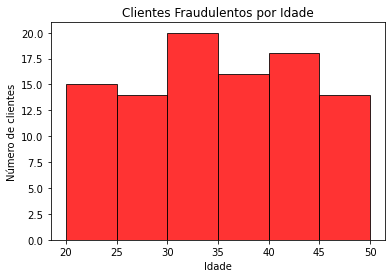

Porcentagem dos clientes que fraudam por idade 
 age
20     1.036269
21     0.584795
22     2.380952
23     2.162162
24     2.234637
25     1.020408
26     1.796407
27     1.401869
28     0.609756
29     2.604167
30     4.166667
31     1.724138
32     2.439024
33     1.764706
34     1.117318
35     2.139037
36     1.538462
37     1.621622
38     1.052632
39     2.339181
40     0.531915
41     3.723404
42     4.022989
43     1.111111
44     0.584795
45     0.546448
46     1.149425
47     1.047120
48     2.173913
49     1.081081
50     1.477833
dtype: float64


In [33]:
#Analyze whether or not the fraudulent transactions are somehow associated to the other features of the dataset. Explain your results.

#A primeira ideia que me veio a cabeça foi encontrar alguma relação do número de fraudes por idade dos clientes.

import pandas as pd
import matplotlib.pyplot as  plt
#Importando duas bibliotecas fundamentais, python para analisar dados e matplotlib para criar gráficos.


frauds = pd.read_csv("frauds.csv", sep = ';' )
customers = pd.read_csv("customers.csv", sep = ';' )
cards = pd.read_csv("cards.csv", sep = ';' )
transactions = pd.read_csv("transactions.csv", sep = ';' )
#Lendo o conjunto de dados dos arquivos csv, todos serão usados.

frauds_id = frauds['transaction_id']



transactions_frauds = transactions.loc[transactions['id'].isin(frauds['transaction_id'])]
frauds_r = transactions_frauds[['id', 'card_number', 'value']]
card_fraud = cards.loc[cards['card_number'].isin(frauds_r['card_number'])]
customer_fraud = customers.loc[customers['id'].isin(card_fraud['customer_id'])]
#Veja que para que relacionemos a transação fraudulenta com o cliente precisamos primeiramente relacionar as fraudes com as transações,
#Na sequência relacionar as transações com o cartão através do número do cartão
#E por último relacinar o cartão com o cliente através do id do cliente


customer_fraud_age = customer_fraud[[ 'age',]].sort_values(by = 'age', ascending = False)
#Essa é a variável que armazena a nossa resposta, a idade dos clientes fraudulentos.



#Vamos criar um histograma para que consigamos visualizar se há relação entre número de fraudes e faixa etária dos clientes.
plt.title('Clientes Fraudulentos por Idade')
plt.xlabel('Idade')
plt.ylabel('Número de clientes')
plt.hist(customer_fraud_age, 6, rwidth=1, color='red', alpha=0.8,    edgecolor='black')
plt.show()

#Vamos também calcular a porcentagem dos clientes que fraudam por idade
age_fraud = customer_fraud_age.value_counts()
age_customers = customers[['age']].value_counts()

print('Porcentagem dos clientes que fraudam por idade \n' , (age_fraud/age_customers)*100)

#Vimos que a distribuição de fraudes por idade parece bem distribuida, assim não conseguimos achar uma relação clara
#Porém obtivemos dados interessantes e possívelmente úteis.

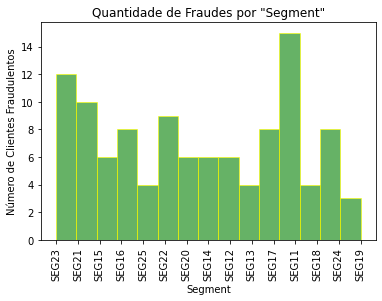

segment
SEG11      2.276176
SEG12      0.863309
SEG13      0.589102
SEG14      0.963082
SEG15      0.878477
SEG16      1.199400
SEG17      1.228879
SEG18      0.586510
SEG19      0.455927
SEG20      0.898204
SEG21      1.579779
SEG22      1.424051
SEG23      1.694915
SEG24      1.195815
SEG25      0.577201
dtype: float64


In [41]:
#Vamos descobrir se há relação entre as fraudes e os segments das transações

transactions_frauds = transactions.loc[transactions['id'].isin(frauds['transaction_id'])]
#Relacionando as fraudes com as transações para extrairmos o 'segment' das transações com fraudes
transactions_frauds_seg = transactions_frauds[['segment']]
transactions_frauds_seg.to_csv('transactions_frauds_seg.csv', index=False)
frauds_seg = pd.read_csv('transactions_frauds_seg.csv')


#Criando um histograma para analisarmos a distribuição das fraudes por 'segment'
plt.hist(frauds_seg,15, rwidth=1.1, color='green', alpha=0.6,    edgecolor='yellow')
plt.title('Quantidade de Fraudes por "Segment"')
plt.xlabel('Segment')
plt.ylabel('Número de Clientes Fraudulentos')
plt.xticks(rotation=90)
plt.show()


frauds_segn = transactions_frauds[['segment']].value_counts()
segn = transactions[['segment']].value_counts()
fraudspor = (frauds_segn/segn)*100
print(fraudspor)

#Com o histograma é fácil visualizar que alguns 'Segments' tem muito mais fraudes do que outros sendo que o que conta com o maior
#número de fraudes é o SEG11 com 15 fraudes enquanto outros segments como o SEG19 conta apenas com 3.
#Para não tirarmos conclusões preciptadas decidi analisar a quantidade de fraudes por seguimento e dividir pela quantidade de
#transações daquele seguimento. Ainda assim encontramos valores maiores para o SEG11 que conta com aproximadamente 2,28%
#de suas transações sendo fraudes. Note 2,28% das transações do SEG11 são fraudes e não 2,28% das fraudes são do SEG11!
#Vemos então uma clara relação das fraudes e dos segmentos!

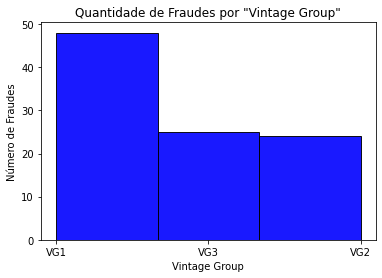

VG1    1.901743
VG3    1.359434
VG2    1.830664
Name: vintage_group, dtype: float64


In [45]:
#Uma outra ideia que eu tive foi analisar a relação de fraudes com "vintage_group", na verdade eu não sei o que é o vintage group
#Mas mesmo sem saber imaginei que este poderia nos retornar alguma informação de valor

customer_fraud_vintage = customer_fraud[[ 'vintage_group']]

vg_fraud = customer_fraud_vintage['vintage_group'].value_counts()
vg = customers['vintage_group'].value_counts()


#Montando um histograma para analisarmos graficamente
plt.title('Quantidade de Fraudes por "Vintage Group"')
plt.xlabel('Vintage Group')
plt.ylabel('Número de Fraudes')
plt.hist(customer_fraud_vintage, 3, rwidth=1, color='Blue', alpha=0.9,    edgecolor='black')
plt.show()


#E por último analisando a porcentagem das transações de cada vintage group que são fraudes.
print((vg_fraud/vg) *100)

#Quando vemos o histograma é fácil notar que o Vintage Group 1 tem mais fraudes do que o 2 e o 3, então decidi analisar a porcentagem,
#Novamente para não termos uma ideia errada. Vemos que o 'VG1' tem aproximadamente 1,9% de clientes com fraudes,
#Enquanto o 'VG2' tem cerca de 1,83% e o 'VG3' 1,36%. Não são valores tão discrepantes, assim sendo, não encontramos uma relação clara.
#Muito embora o histograma tenha apontado que possivelmente nossa hipótese inicial tenha algum valor, as porcentagens nos mostraram que
#Se há alguma relação entre o Vintage Group e as Fraudes, essa relação é bastante sutil.


#PS: É fácil visualizar que o 'segment' do cliente está diretamente relacionado
#com o vintage group, da seguinte forma: VG1=Diamond ; VG2=Platinum ; VG3=Gold. Isso não nos traz grandes ideias porém achei interessante.


In [56]:
#Outro insight foi analisar as datas das transações fraudulentas para saber as épocas do ano com maior incidência de fraudes.
#Para isso vamos analisar o ano em trimestres.

frauds_date = transactions_frauds[['transaction_date']]
selecao = (frauds_date['transaction_date'] >= '2016-01-01') & (frauds_date['transaction_date'] <= '2016-04-31')
df_date = frauds_date[selecao]
#Para  isso selecionamos as transações fraudulentas que ocorreram entre 01/01/2016 e 31/04/2016 e descobrimos quantas são.

print ('Primeiro Trimestre:', len(df_date))

selecao = (frauds_date['transaction_date'] >= '2016-05-01') & (frauds_date['transaction_date'] <= '2016-08-31')
df_date= frauds_date[selecao]
#Depos Selecionamos as transações fraudulentas que ocorreram entre 01/05/2016 e 31/08/2016 e descobrimos quantas são.


print ('Segundo Trimestre:', len(df_date))

selecao = (frauds_date['transaction_date'] >= '2016-09-01') & (frauds_date['transaction_date'] <= '2016-12-31')
df_date = frauds_date[selecao]
#Depos Selecionamos as transações fraudulentas que ocorreram entre 01/09/2016 e 31/12/2016 e descobrimos quantas são.

print ('Terceiro Trimestre:', len(df_date))

#Então temos o número de transações por trimestre, vemos que as fraudes estão bem distribuidas ao longo do ano.
#Logo não há grandes relações das fraudes com os trimestres.

Primeiro Trimestre: 37
Segundo Trimestre: 33
Terceiro Trimestre: 39
